# Exploring Titanic Survival Data
The source of this dataset comes from Kaggle competition
https://www.kaggle.com/c/titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, the analysis was performed on what sorts of people were likely to survive. In particular, the tools of machine learning were applied to predict which passengers survived the tragedy.


# Importing all necessary packages for  workflow

In [1]:
#First loadind packages
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Read data and quick preview
Reading train and test datasets

In [2]:
#open a file with data
filename = 'titanic_data.csv'
train_df = pd.read_csv(filename)
test_df = pd.read_csv('test.csv')


In [3]:
#quick check of loaded data
train_df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

So, we have data in numerical and categorical form, 7 features are integer or floats (one less for test dataset), 5 are strings

In [7]:
#checking overall stats with describe() per column
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#checking how many 0 values we have per colummn
train_df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Correlations between features

Survival chances based on Class, Sex and Number of people from the same family on board

In [77]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], \
                                         as_index=False).mean().\
sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000121EDD666A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000121EE1D4208>], dtype=object)

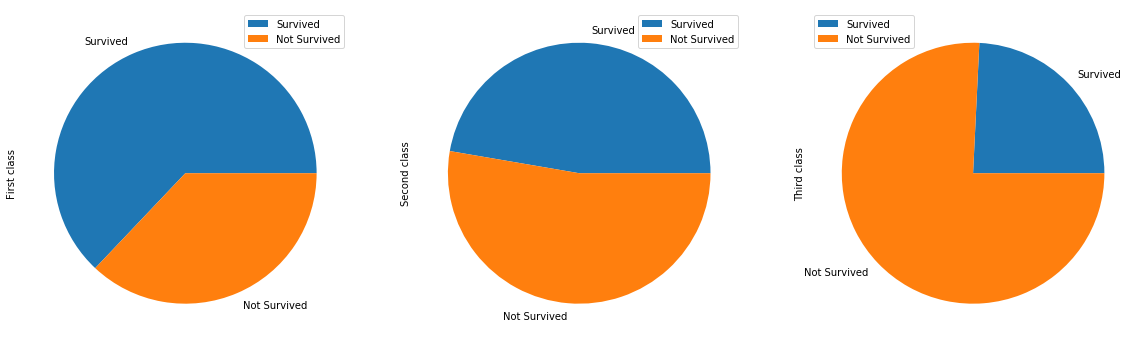

In [11]:
#pie charts survival chances based on class
survivalclass_piplot=pd.DataFrame({'First class':[0.629630, 1-0.629630],
                                  'Second class':[0.472826, 1-0.472826],
                                  'Third class':[0.242363, 1-0.242363]},
                                 index=['Survived', 'Not Survived'])

survivalclass_piplot.plot(kind='pie', subplots=True, figsize=(20,6))

In [13]:
train_df[["Sex", "Survived"]].groupby(['Sex'], \
                                      as_index=False).mean(). \
sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'],\
                                        as_index=False).mean().\
sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[["Parch", "Survived"]].groupby(['Parch'],\
                                        as_index=False).mean().\
sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Visualizations of survival

## Age as a main indicator of survival

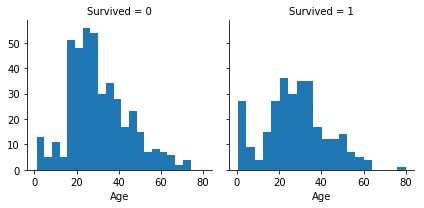

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Highest chances of survival are in 15-35 age category
## Survival chances based on passenger's class


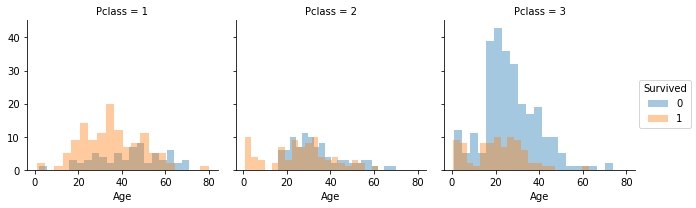

In [17]:
grid  =  sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.4, bins=20)
grid.add_legend();

Most passangers in Class-1 survived. The biggest category class-3 had the lowest survival rates, however infant passengers from class-2 and class-3 mostly survived. So class is a good feature for model training.

##  Survival chances based on sex and port of embarkment

More female passengers survived than male, so Sex is another good feature for a model training with the only exception Embarked=C where males had higher survival rates. So, port of embarkment should be included in model as well.



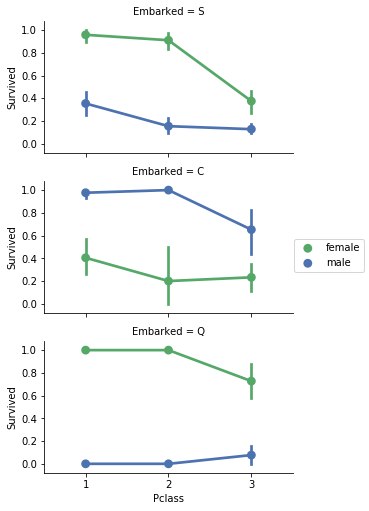

In [18]:
#port of embankment vs sex survival
grid = sns.FacetGrid(train_df, row='Embarked', size=2.4, aspect=1.8)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Another feature to test is survival based on fare type.


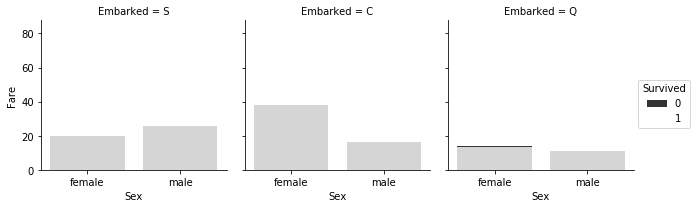

In [19]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.8, ci=None)
grid.add_legend()

# Data wrangle for machine learning


## Dropping redundant information
First I will drop redundant features that dont have any correlation with survival rates 'Ticket' and 'Cabin' This should slightly speedup processing.

In [20]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

## Creating new features from existing ones

First, analyse how 'Title' correlates with survival rates


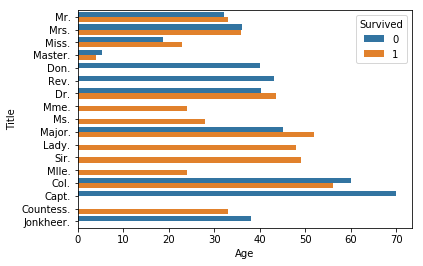

In [21]:
train_df['Title'] = train_df.Name.str.extract('(\w+\.)', expand=False)
sns.barplot(hue="Survived", x="Age", y="Title", data=train_df, ci=False)

In [22]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q


In [23]:
test_df['Title'] = test_df.Name.str.extract('(\w+\.)', expand=False)
test_df = test_df.drop(['Name'], axis=1)
test_df.describe(include=['O'])

,Sex,Embarked,Title
count,418,418,418
unique,2,3,9
top,male,S,Mr.
freq,266,270,240


In [24]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr.
1,893,3,female,47.0,1,0,7.0000,S,Mrs.
2,894,2,male,62.0,0,0,9.6875,Q,Mr.


In [25]:
#drop 'Name' from train_df as well, and PassengerID(redundant information)
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)

## Converting categorical feature to numerical
Sex from male and female to 0=male, and 1=female

In [26]:
#convertion for train_df dataset
train_df['Gender'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.loc[:, ['Gender', 'Sex']].head(3)

,Gender,Sex
0,0,male
1,1,female
2,1,female


In [27]:
#same convertion for test_df dataset
test_df['Gender'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df.loc[:, ['Gender', 'Sex']].head(3)

,Gender,Sex
0,0,male
1,1,female
2,0,male


In [28]:
#drop Sex from both datasets
train_df = train_df.drop(['Sex'], axis=1)
test_df = test_df.drop(['Sex'], axis=1)
train_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,0,3,22.0,1,0,7.2500,S,Mr.,0
1,1,1,38.0,1,0,71.2833,C,Mrs.,1
2,1,3,26.0,0,0,7.9250,S,Miss.,1


## Filling missing or Null values

First, we need to fill up Age, as we have 177 missing or Null values.

In [29]:
train_df.isnull().sum(axis=0)

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
Gender        0
dtype: int64

Three possible options to generate Age are:

1.  to generate random numbers between mean and standard deviation.

2.  to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combination of 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

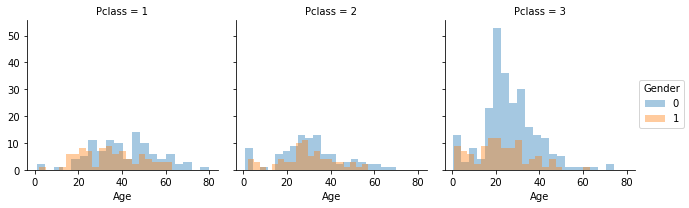

In [30]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid.map(plt.hist, 'Age', alpha=.4, bins=20)
grid.add_legend();

In [31]:
#create an emptry array

In [32]:
missing_age = np.zeros((2,3))
missing_age

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

So, we will calculate Age based on class and Gender and produce 6 combinations

In [33]:
for i in range(0,2):  #gender
    for j in range(0,3):  #class
        missing_df=train_df[(train_df['Gender'] == i) & \
                           (train_df['Pclass'] == j+1)]['Age'].dropna()
        #calculation median for each combination
        age_missing=missing_df.median()
        
        #filling an array with missing age, converting float to int
        missing_age[i,j] = int(age_missing/0.5 + 0.5 )*0.5
#checking array missing age from combination of class and gender        
missing_age

array([[ 40. ,  30. ,  25. ],
       [ 35. ,  28. ,  21.5]])

In [34]:
#filling missing age in train_df dataset
train_df['AgeMissing'] = train_df['Age']

for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Gender == i) & (train_df.Pclass == j+1),\
                'AgeMissing'] = missing_age[i,j]

train_df[train_df['Age'].isnull()][['Gender','Pclass','Age','AgeMissing']].head(3)

,Gender,Pclass,Age,AgeMissing
5,0,3,NaN,25.0
17,0,2,NaN,30.0
19,1,3,NaN,21.5


In [35]:
#repeat the same algorithm for test_df dataset
missing_age = np.zeros((2,3))
for i in range(0,2):  #gender
    for j in range(0,3):  #class
        missing_df=test_df[(test_df['Gender'] == i) & \
                           (test_df['Pclass'] == j+1)]['Age'].dropna()
        #calculation median for each combination
        age_missing=missing_df.median()
        
        #filling an array with missing age, converting float to int
        missing_age[i,j] = int(age_missing/0.5 + 0.5 )*0.5
#checking array missing age from combination of class and gender        
missing_age
test_df['AgeMissing'] = test_df['Age']

for i in range(0, 2):
    for j in range(0, 3):
        test_df.loc[ (test_df.Age.isnull()) & (test_df.Gender == i) & \
                    (test_df.Pclass == j+1),\
                'AgeMissing'] = missing_age[i,j]

test_df[test_df['Age'].isnull()][['Gender','Pclass','Age','AgeMissing']].head(3)

,Gender,Pclass,Age,AgeMissing
10,0,3,NaN,24.0
22,1,1,NaN,41.0
29,0,3,NaN,24.0


For train_df and test_df Age arrays seems to be a bit different, and medians for both datasets could be different, so it is expected.
Now, I can delete Age columns from both datasets

In [36]:
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)
train_df.head(3)

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Title,Gender,AgeMissing
0,0,3,1,0,7.2500,S,Mr.,0,22.0
1,1,1,1,0,71.2833,C,Mrs.,1,38.0
2,1,3,0,0,7.9250,S,Miss.,1,26.0


## Filling categorical feature
2 passangers dont have any information on Port of Embarkation, so I will try to fill out this information with the port of the most commong occurance. In test_df dataset port of embarkation is filled for all passangers.

In [37]:
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [38]:
#fill missing port
train_df['EmbarkedFill'] = train_df['Embarked']
train_df.loc[train_df['Embarked'].isnull(), 'EmbarkedFill'] = freq_port
train_df[train_df['Embarked'].isnull()][['Embarked','EmbarkedFill']].head(2)

,Embarked,EmbarkedFill
61,NaN,S
829,NaN,S


In [39]:
#copy Embarked to EmbarkedFill in test_df dataset
#drop 'Embarked' from both datasets
test_df['EmbarkedFill'] = test_df['Embarked']
train_df = train_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)
train_df.head(3)

,Survived,Pclass,SibSp,Parch,Fare,Title,Gender,AgeMissing,EmbarkedFill
0,0,3,1,0,7.2500,Mr.,0,22.0,S
1,1,1,1,0,71.2833,Mrs.,1,38.0,C
2,1,3,0,0,7.9250,Miss.,1,26.0,S



## Converting EmbarkedFill to numerical feature
C = 0
Q = 1
S = 2
And dropping EmbarkedFill from datasets

In [40]:
train_df['Port'] = train_df['EmbarkedFill'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)
train_df.loc[:, ['Port', 'EmbarkedFill']].head(3)

,Port,EmbarkedFill
0,2,S
1,0,C
2,2,S


In [41]:
test_df['Port'] = test_df['EmbarkedFill'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)
#drop EmbarkedFill from both datasets
train_df = train_df.drop(['EmbarkedFill'], axis=1)
test_df = test_df.drop(['EmbarkedFill'], axis=1)
train_df.head(3)

,Survived,Pclass,SibSp,Parch,Fare,Title,Gender,AgeMissing,Port
0,0,3,1,0,7.2500,Mr.,0,22.0,2
1,1,1,1,0,71.2833,Mrs.,1,38.0,0
2,1,3,0,0,7.9250,Miss.,1,26.0,2


## Converting title to Numerical information
This will be done by sequencing in the order of occurence


In [ ]:
#Alternative way to convert categorical to numerical information
#using sklearn.preprocessing replace Sex and Embarked as numbers


#from sklearn.preprocessing import LabelEncoder
#lbl_enc = LabelEncoder()


#for c in ['Embarked', 'Sex']:
#    raw_data[c] = lbl_enc.fit_transform(raw_data[c].astype(str))
#    test[c] = lbl_enc.transform(test[c].astype(str))
    
#test[:3]


In [47]:
#set unique numbers for Titles
Titles  =  list(enumerate(np.unique(train_df['Title'])))

Titles_dict = { name : i for i, name in Titles }           
train_df['TitleNum'] = train_df.Title.map( lambda x: Titles_dict[x]).astype(int)

Titles = list(enumerate(np.unique(test_df['Title'])))
Titles_dict = { name : i for i, name in Titles }           
test_df['TitleNum'] = test_df.Title.map( lambda x: Titles_dict[x]).astype(int)

train_df[['Title', 'TitleNum']].head(10)                 


,Title,TitleNum
0,Mr.,12
1,Mrs.,13
2,Miss.,9
3,Mrs.,13
4,Mr.,12
5,Mr.,12
6,Mr.,12
7,Master.,8
8,Mrs.,13
9,Mrs.,13


In [48]:
#drop title
train_df = train_df.drop(['Title'], axis=1)
test_df = test_df.drop(['Title'], axis=1)

In [49]:
#quick check
test_df.head(3)

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeMissing,Port,TitleBand,TitleNum
0,892,3,0,0,7.8292,0,34.5,1,5,5
1,893,3,1,0,7.0000,1,47.0,2,6,6
2,894,2,0,0,9.6875,0,62.0,1,5,5


## Rounding numerical value - Fare
Fare has too much information, for quicker computations in modeling could be rounded. As well, Fare information is missing for a few passangers, so this could be filled with median values

In [50]:
#filling missing values with median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

#rounding Fare
train_df['Fare'] = train_df['Fare'].round(2)
test_df['Fare'] = test_df['Fare'].round(2)
#quick check
test_df.head(3)

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeMissing,Port,TitleBand,TitleNum
0,892,3,0,0,7.83,0,34.5,1,5,5
1,893,3,1,0,7.00,1,47.0,2,6,6
2,894,2,0,0,9.69,0,62.0,1,5,5


# Machine learning - modeling

Now data is ready for machine learning algorithms.
Here, I am going to use classification and regression. 
I need to identify passangers who were more likely to survive based on( Gender, Port, Age, Family size...) (classification problem)

Machine learning algorithms that I am going to use are:

1. Logistic Regression
2. Support Vector Machines
3. KNN or k-Nearest Neighbors
4. Gaussian Naive Bayes classifier
5. Decision Tree
6. Random Forrest


In [51]:
#prepare datasets
#split train_df dataset to 2 datasets, one that doesnt have information on survival, another one only survived column.
X_train = train_df.drop("Survived", axis=1)
X_train.head(3)

,Pclass,SibSp,Parch,Fare,Gender,AgeMissing,Port,TitleBand,TitleNum
0,3,1,0,7.25,0,22.0,2,12,12
1,1,1,0,71.28,1,38.0,0,13,13
2,3,0,0,7.92,1,26.0,2,9,9


In [52]:
Y_train = train_df["Survived"]
Y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [53]:
#dropping 'PassengerId' from test dataset as redundant information for modeling
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test.head(3)

,Pclass,SibSp,Parch,Fare,Gender,AgeMissing,Port,TitleBand,TitleNum
0,3,0,0,7.83,0,34.5,1,5,5
1,3,1,0,7.00,1,47.0,2,6,6
2,2,0,0,9.69,0,62.0,1,5,5


In [54]:
#quick check on 3 datasets we are going to put in a model
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

## 1. Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Confidence score is generated for df_train dataset.

In [59]:
#logistic regression

mod_logreg=LogisticRegression()
mod_logreg.fit(X_train,Y_train)
#prediction for test dataset
Y_pred_logreg=mod_logreg.predict(X_test)

#score for df_train dataset
score_logreg=round(mod_logreg.score(X_train, Y_train) * 100, 2)
score_logreg


80.700000000000003

Logistic Regression Conclusion:  80.7% is pretty good score for initial model, so logistic regression could be used for validation of assumptions and decisions for feature modeling.
Correlation coefficients with survival rates has to be calculated for feature selection.

In [56]:
#create dataframe with feature selection
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(mod_logreg.coef_[0])
#sort correlation coefficients in Ascending order

coeff_df.sort_values(by='Correlation', ascending = False)


,Feature,Correlation
4,Gender,2.594466
3,Fare,0.003303
7,TitleBand,-0.003246
8,TitleNum,-0.003246
5,AgeMissing,-0.035713
2,Parch,-0.085193
6,Port,-0.151013
1,SibSp,-0.326627
0,Pclass,-1.010189


## 2. Support Vector Machines (SVM)

Support Vector Machines is a supervised learning model  for classification and regression analysis.
Training sets are marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier


Lastly, checking confidence score for comparison with Logistic Regression model

In [60]:
#support vector machines (SVM)
svm_model=SVC()
svm_model.fit(X_train, Y_train)
#predicting for test dataset
Y_pred_svm=svm_model.predict(X_test)

#checking score
score_svm = round(svm_model.score(X_train, Y_train) * 100, 2)
score_svm

91.019999999999996

SVM score seems to be better than Logistic regression, therefore so far SVM model gives us better prediction accuracy of survival

## 3. K - Nearest Neighbors (k - NN)

k-Nearest Neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [64]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, Y_train)
#prediction for test dataset
Y_pred_knn=knn_model.predict(X_test)

#accuract score
score_knn = round(knn_model.score(X_train, Y_train) * 100, 2)
score_knn

84.849999999999994

KNN confidence score is better than Logistics Regression but worse than SVM.

## 4. Gaussian Naive Bayes classifier.

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 



In [66]:
gaussian_nb_model=GaussianNB()
gaussian_nb_model.fit(X_train, Y_train)
#prediction for test dataset
Y_pred_nb=gaussian_nb_model.predict(X_test)
#Gaussian score
score_gaussian = round(gaussian_nb_model.score(X_train, Y_train) * 100, 2)
score_gaussian

80.920000000000002

Naive Bayes accuracy score seems to be simmilar to logistic regression results

## 5. Decision Tree classifier

Decision tree is based on predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 


In [67]:
#decision tree classicier
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)
#predictions for test dataset
Y_pred_dectree=decision_tree_model.predict(X_test)
#accuracy score
score_dectree = round(decision_tree_model.score(X_train, Y_train) * 100, 2)
score_dectree

98.200000000000003

The highest score so far predicts 98% correct is decision tree

## 6. Random forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees


In [70]:
#Random Forest

random_forest_model=RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, Y_train)
#prediction for test model
Y_pred_ranforest=random_forest_model.predict(X_test)
#accuracy score for random forest with 100 trees
score_rantrees = round(random_forest_model.score(X_train, Y_train) * 100, 2)
score_rantrees

98.200000000000003

Accuracy of Random forest Model is the same as Decision Tree

# Model evaluation

After looking into 6 classification machine learning algorithms a summary can be drawn.
The best results were shown by the Random forest and Decision Tree and equal to 98% success rate
Let's show all results as a table:


In [71]:
all_models=pd.DataFrame({
    'Model' : ['SVM','k-NN','Logistic Regression','Random Forest', 'Naive Bayes', 'Desicion Tree' ],
    'Score' : [score_svm, score_knn,score_logreg,score_rantrees,score_gaussian,score_dectree]
})

#sort in a table by the score result
all_models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
5,Desicion Tree,98.20
0,SVM,91.02
1,k-NN,84.85
4,Naive Bayes,80.92
2,Logistic Regression,80.70


##  Writing best results in CSV file for Kaggle submission

In [75]:
#producing dataframe with results for output to file
kaggle_submission=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred_ranforest
})
kaggle_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0


In [76]:
#writing results to csv file
kaggle_submission.to_csv('kaggle_submission_rf.csv', index=False)